# Bolsa de Palabras (Bag of Words) en el Procesamiento del Lenguaje Natural: Concepto, Implementación en Python y Casos de Uso

El modelo de Bolsa de Palabras (Bag of Words o BoW) es una técnica fundamental en el campo del Procesamiento del Lenguaje Natural (PLN) que se utiliza para representar textos de una manera numérica, adecuada para el análisis por algoritmos de aprendizaje automático. Esta técnica se basa en la idea de cuantificar la frecuencia de las palabras dentro de un documento o un conjunto de documentos, ignorando la estructura gramatical y el orden en que aparecen. La representación resultante permite comparar documentos y analizar la importancia de las palabras en diversas tareas de PLN. 

En esencia, el modelo BoW funciona creando un vocabulario de todas las palabras únicas presentes en el corpus de texto. Luego, cada documento se representa como un vector, donde cada dimensión corresponde a una palabra del vocabulario. El valor en cada dimensión indica la frecuencia con la que aparece esa palabra específica en el documento. Por ejemplo, consideremos dos frases simples: "el perro ladra" y "el gato maulla". El vocabulario sería {"el", "perro", "ladra", "gato", "maulla"}. La representación BoW para la primera frase podría ser  y para la segunda , indicando la presencia y frecuencia de cada palabra del vocabulario en cada frase.  

| Documento | el | perro | ladra | gato | maulla |
| --------------- | -- | ----- | ----- | ---- | ------ |
| el perro ladra | 1 | 1 | 1 | 0 | 0 |
| el gato maulla | 1 | 0 | 0 | 1 | 1 |

Esta representación vectorial transforma datos textuales complejos en datos numéricos estructurados que pueden ser utilizados por algoritmos de aprendizaje automático para diversas tareas.

## Implementación del Modelo Bolsa de Palabras en Python con Jupyter Notebook

La implementación del modelo BoW en Python es sencilla gracias a la biblioteca **scikit-learn**, que proporciona herramientas eficientes para el procesamiento de texto. A continuación, se presenta un ejemplo utilizando Jupyter Notebook:

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus of text documents
corpus = [
    'Este es el primer documento.',
    'Este documento es el segundo documento.',
    'Y este es el tercer documento.',
    'Es este el primer documento?',
]

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the corpus and transform the corpus into a document-term matrix
X = vectorizer.fit_transform(corpus)

# Get the vocabulary (unique words in the corpus)
vocabulary = vectorizer.get_feature_names_out()

# Convert the document-term matrix to a dense array for easier visualization
X_dense = X.toarray()

# Create a pandas DataFrame to display the Bag of Words representation
bow_df = pd.DataFrame(X_dense, columns=vocabulary)

# Print the DataFrame
print("Bag of Words Representation:")
print(bow_df)

Bag of Words Representation:
   documento  el  es  este  primer  segundo  tercer
0          1   1   1     1       1        0       0
1          2   1   1     1       0        1       0
2          1   1   1     1       0        0       1
3          1   1   1     1       1        0       0


## Explicación Detallada del Código Python

1) **import pandas as pd**: Esta línea importa la biblioteca **pandas**, fundamental para la creación y manipulación de DataFrames, una estructura de datos tabular que facilita la visualización de la representación BoW.

2) **from sklearn.feature_extraction.text import CountVectorizer**: Aquí se importa la clase **CountVectorizer** desde **scikit-learn**, que es la herramienta principal para construir el modelo Bolsa de Palabras.

3) **corpus = [...]**: Se define una lista de documentos de texto como ejemplo. En un escenario real, estos serían los datos de texto que se desean analizar.

4) **vectorizer = CountVectorizer()**: Se inicializa una instancia de la clase **CountVectorizer**. Se utilizan los ajustes predeterminados, pero CountVectorizer ofrece varios parámetros para personalizar el proceso de tokenización, como la eliminación de palabras vacías (stop words) o la generación de n-gramas.  

5) **X = vectorizer.fit_transform(corpus)**: Este es el paso crucial.

    - **vectorizer.fit(corpus)**: Esta parte del código aprende el vocabulario a partir del corpus. Identifica todas las palabras únicas presentes en los documentos.
    - **vectorizer.transform(corpus)**: Luego, esta parte transforma cada documento del corpus en un vector basado en el vocabulario aprendido, contando las ocurrencias de cada palabra. El resultado X es una representación de matriz dispersa de la Bolsa de Palabras. El método **fit_transform()** combina eficientemente el aprendizaje del vocabulario y la transformación de los documentos.   

6) **vocabulary = vectorizer.get_feature_names_out()**: Esta línea recupera el vocabulario que se aprendió con el método **fit()**. Es una lista de todas las palabras únicas en el corpus.

7) **X_dense = X.toarray()**: El método **transform()** devuelve una matriz dispersa, que es eficiente para el almacenamiento pero puede ser menos intuitiva de leer. Esta línea convierte la matriz dispersa en un array denso de NumPy.

8) **bow_df = pd.DataFrame(X_dense, columns=vocabulary)**: Esto crea un DataFrame de pandas.

    - **X_dense** proporciona los datos (los recuentos de palabras para cada documento).
    - **columns=vocabulary** establece los nombres de las columnas del DataFrame como las palabras del vocabulario.

9) **print("Bag of Words Representation:") y print(bow_df)**: Estas líneas simplemente imprimen el DataFrame resultante, que muestra la representación de Bolsa de Palabras del corpus. Cada fila representa un documento, cada columna representa una palabra en el vocabulario, y los valores indican la frecuencia de esa palabra en ese documento.   

Al ejecutar este código, se observará una tabla donde cada fila corresponde a uno de los documentos originales en el **corpus**. Las columnas de la tabla son las palabras únicas encontradas en todo el **corpus** (el vocabulario), ordenadas alfabéticamente de forma predeterminada. Los números en la tabla representan la frecuencia de cada palabra en el documento correspondiente.  

## Casos de Uso del Modelo Bolsa de Palabras en PLN

El modelo Bolsa de Palabras es una técnica fundamental con diversas aplicaciones en el Procesamiento del Lenguaje Natural.  

- **Clasificación de Texto**: BoW es una técnica base para diversas tareas de clasificación de texto, donde el objetivo es asignar una categoría o etiqueta predefinida a un documento de texto. Por ejemplo, en la detección de spam, los correos electrónicos se clasifican como "spam" o "no spam" basándose en la frecuencia de ciertas palabras comunes en los mensajes no deseados. De manera similar, la categorización de temas clasifica artículos de noticias en diferentes secciones como "deportes", "política" o "tecnología" según su contenido léxico. La presencia y la frecuencia de palabras específicas pueden ser indicadores fuertes de la categoría a la que pertenece un documento. Algoritmos de aprendizaje automático como Naive Bayes o las Máquinas de Vectores de Soporte pueden ser entrenados con representaciones BoW para realizar la clasificación de texto.   

- **Análisis de Sentimiento**: El análisis de sentimiento se centra en determinar el tono emocional u opinión expresada en un texto, categorizándolo típicamente como positivo, negativo o neutral. BoW puede utilizarse eficazmente para esta tarea. Por ejemplo, al analizar las reseñas de clientes de un producto, la frecuencia de palabras positivas (como "increíble", "excelente") y negativas (como "terrible", "pésimo") puede indicar la satisfacción general del cliente. La prevalencia de palabras asociadas con emociones positivas o negativas dentro de un texto proporciona una fuerte indicación del sentimiento general.  

- **Recuperación de Información**: En el campo de la recuperación de información, BoW desempeña un papel crucial en los motores de búsqueda y los sistemas de recuperación de documentos. La idea básica es hacer coincidir las consultas de los usuarios (también representadas como una bolsa de palabras) con los documentos de una colección en función de la similitud de su contenido léxico. Los documentos que contienen un mayor número de las mismas palabras que la consulta del usuario generalmente se consideran más relevantes.   

- **Otras Aplicaciones**:

a) **Etiquetado Automático y Extracción de Palabras Clave**: BoW puede ayudar a identificar las palabras más frecuentes en un documento, que pueden servir como etiquetas o palabras clave relevantes.   

b) **Sistemas de Recomendación de Contenido**: Al comparar las representaciones BoW de diferentes elementos (por ejemplo, artículos, películas), los sistemas de recomendación pueden sugerir elementos con contenido similar.  

c) **Aplicaciones Históricas en Anotación de Imágenes**: Curiosamente, el concepto de "Bolsa de Palabras Visuales" se aplicó inicialmente en la recuperación de imágenes y videos, donde las características visuales se trataban como palabras.  

d) **Base para Modelos Avanzados**: BoW puede ser un componente o un punto de partida para modelos de PLN más sofisticados, como en las capas iniciales de algunas arquitecturas de redes neuronales o en el entrenamiento de incrustaciones de palabras como word2vec.   

## Ventajas y Limitaciones del Modelo Bolsa de Palabras

El modelo Bolsa de Palabras ofrece varias ventajas significativas, pero también presenta ciertas limitaciones importantes.

- **Ventajas**:
        
a) **Simplicidad**: El modelo BoW es conceptualmente muy sencillo y fácil de entender e implementar.   

b) **Eficiencia**: Es computacionalmente eficiente, especialmente para grandes conjuntos de datos, ya que implica principalmente contar las ocurrencias de palabras.  

c) **Eficacia para Tareas Básicas**: A pesar de su simplicidad, BoW puede ser sorprendentemente eficaz para una variedad de tareas básicas de PLN, particularmente cuando el orden de las palabras no es crucial para comprender el significado general o la categoría del texto.  

d) **Proporciona una Línea Base**: Sirve como un buen modelo de referencia para comparar con técnicas de PLN más complejas.

e) **Facilidad de Uso con Bibliotecas**: Bibliotecas como **scikit-learn** proporcionan herramientas fáciles de usar para crear representaciones BoW.   

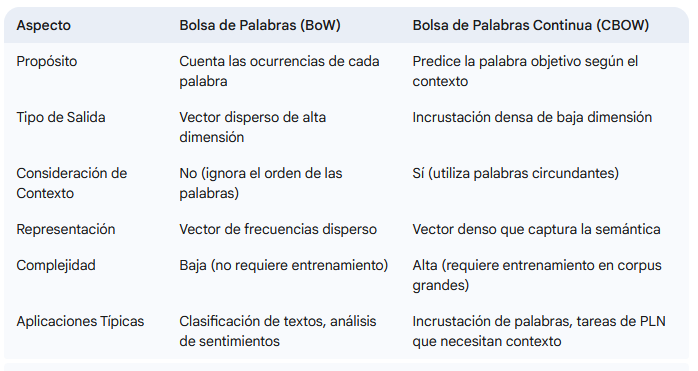

- **Limitaciones**:

a) **Ignora el Orden de las Palabras**: Una limitación significativa de BoW es que ignora por completo el orden de las palabras en una oración. Esto puede llevar a la pérdida de información crucial, ya que el significado de una oración a menudo depende de la disposición de sus palabras.   

b) **Ignora el Contexto y la Semántica**: BoW trata cada palabra de forma independiente y no captura las relaciones semánticas entre las palabras ni el contexto en el que aparecen. Los sinónimos (palabras con significados similares) se tratan como palabras distintas, y las palabras polisémicas (palabras con múltiples significados) se tratan como la misma palabra, lo que puede generar ambigüedad.  

c) **Suposición de Independencia de Palabras**: El modelo asume que la aparición de una palabra es independiente de la aparición de otras palabras, lo que a menudo no es cierto en el lenguaje natural.  

d) **Alta Dimensionalidad**: El tamaño del vocabulario puede ser muy grande, especialmente para corpus extensos, lo que resulta en vectores dispersos de alta dimensión. Esto puede aumentar los costos computacionales y puede llevar a la "maldición de la dimensionalidad".  

e) **Palabras Fuera del Vocabulario (OOV)**: Si un documento contiene palabras que no estaban presentes en el corpus de entrenamiento utilizado para construir el vocabulario, estas palabras serán ignoradas por el modelo BoW durante el proceso de transformación.

f) **No Captura Información de N-gramas**: El BoW básico solo considera palabras individuales. No tiene en cuenta las frases o secuencias de palabras (n-gramas) que pueden tener un significado importante. 

# Conclusión

El modelo Bolsa de Palabras es una técnica esencial en el PLN que representa el texto contando las frecuencias de las palabras, ignorando la gramática y el orden de las mismas. Su implementación es sencilla, especialmente con scikit-learn en Python, y resulta eficaz para diversas tareas básicas de PLN como la clasificación de texto, el análisis de sentimiento y la recuperación de información.

A pesar de sus limitaciones para capturar el orden de las palabras y el significado semántico, BoW sigue siendo un concepto fundamental en el PLN. Sirve como un punto de partida para comprender técnicas más avanzadas de representación de texto y todavía se utiliza ampliamente como modelo de referencia o para tareas donde su simplicidad y eficiencia son ventajosas.

BoW es una opción adecuada para tareas donde el tema general o el sentimiento se determinan principalmente por la presencia y frecuencia de ciertas palabras clave, y donde el orden de las palabras no es críticamente importante. También es útil para la exploración inicial de datos de texto y para la construcción rápida de modelos simples y eficientes. Sin embargo, para tareas que requieren una comprensión más profunda del lenguaje, se pueden emplear técnicas más avanzadas como TF-IDF, n-gramas e incrustaciones de palabras para lograr un mejor rendimiento.